<a href="https://colab.research.google.com/github/MattiaFiore/Source-Coding-Project/blob/main/Huffman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Huffman Coding
In this notebook we will:


*   create a huffman encoder
*   create a huffman decoder
*   create an animation of how the decoding procedure work

Then we will use the code to compress two files:

*   the book 'war and peace'
*   some DNA sequences





# Huffman encoder

In [1]:
import sys
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import matplotlib
from itertools import product
import math
import networkx as nx
import time
from math import log2, ceil

In [2]:
!git clone https://github.com/MattiaFiore/Source-Coding-Project.git

Cloning into 'Source-Coding-Project'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 76 (delta 42), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (76/76), 3.56 MiB | 7.23 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [3]:
sys.path.append('/content/Source-Coding-Project')

In [4]:
import SourceCoding

## Step 1
Analyzing source statistics: it is very easy using the Counter object.

In [5]:
text = '''Lorem ipsum dolor sit amet. Qui laborum iste eos dolorum optio et odio
 numquam est internos expedita id similique galisum ut quasi laboriosam 33
 dolorem nisi. Qui tempora iusto rem minima iusto aut provident totam At animi
 laudantium et vero vitae ea ratione sunt rem sint eveniet. Et dicta dolores
 sed nemo enim est rerum voluptatum qui placeat dolore est voluptatem molestiae
 aut iure corrupti.'''
count = Counter(text)

<BarContainer object of 27 artists>

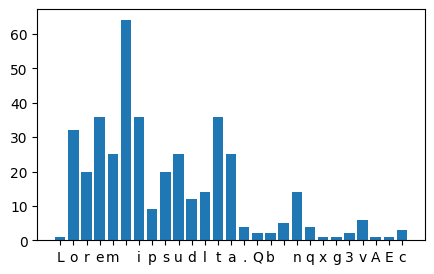

In [6]:
plt.rcParams['figure.figsize'] = (5, 3)
plt.bar(count.keys(), count.values())

In [7]:
# This dictionary the chars as keys and their probability
# as values
dictionary = {j : k /count.total() for j,k in count.items()}

#To see the dictionary you can uncomment the for loop
#with the print.

#for j,k in dictionary.items():
#  print(f'Symbol: {j}\nProbability: {k}')

## Step 2
We need a function that will be able to group symbols and get all the possible combination.


```python
def create_groups(symbols, length):
```

That with:
```python
create_groups([A,B], 2)
```
Returns output:
```python
['AA', 'AB', 'BA', 'BB']
```
Luckily this is exactly what the product function of the itertools library do:

In [8]:
def create_blocks(symbols, length):
  return list(product(symbols, repeat = length))

In [9]:
create_blocks(['A', 'B'], 2)

[('A', 'A'), ('A', 'B'), ('B', 'A'), ('B', 'B')]

## Step 3
We want to computer probability of the group. For example if we have ['AA', 'AB', 'BA', 'AA'] and p(A) = 0.9 while p(B) = 0.1 we should get:

P(AA) = 0.81 P(AB) = 0.09 p(BA) = 0.09 P(BB) = 0.01

In [10]:
def gen_dict(groups, probability):
  return { j:math.prod([probability[i] for i in j]) for j in groups}

In [11]:
dictionary = gen_dict([('A', 'A'), ('A', 'B'), ('B', 'A'), ('B', 'B')], {'A':0.9, 'B': 0.1})

for j,k in dictionary.items():
  print(f'key: {j} - value: {k}')

key: ('A', 'A') - value: 0.81
key: ('A', 'B') - value: 0.09000000000000001
key: ('B', 'A') - value: 0.09000000000000001
key: ('B', 'B') - value: 0.010000000000000002


## Step 1-2-3 Combined

We can put togheter all steps to create the starting point for a huffman encoder scheme. We'll do this on a DNA sequence: https://www.biointeractive.org/sites/default/files/Anolis-DNA-sequences.txt


In [12]:
DNA_sequence = """ATGAGCCCCCTTACAACAACAATTCTACTATCAAGCTTAGCAACCGGCACCATCATTACAGCCACAAGCTATCACTGACTATTAGCTTGAATTGGCCTTGAACTAAACACATTAGCTATCATTCCAATTATCTCAAAACAACATCACCCCCGAGCGACAGAGGCCGCCACCAAGTACTTCTTAACTCAAGCAGCTGCTTCAGCACTAATCCTATTCTCAAGTACAATCAACGCTTGACACTCAGGAACTTGGGACATTACACAAATAACAAACAATACATCAAACATCTTACTAACAATGGCACTAGCCATAAAATTAGGCCTTGCACCAACACACTACTGACTCCCAGAGGTTATTCAAGGAACATCAATAACAACAGCCCTAATTATTACTACGTGACAAAAACTAGCCCCTATAGCACTCATTATTATTACAAGCAACAACTTATCCTATATAGTCTTAATAACAATGGGGGTATTATCTACCATCGTAGGAGGATGGGGCGGCCTAAACCAAACCCAAACCCGAAAAATCATAGCGTACTCCTCAATCGCACACCTTGGCTGAATATCAATGGTTACCCCACTAATAACAAAACTACTCATTTTAAACCTTGGCATTTACATCCTAATAACAACAGCTATATTCCTCTCACTAATTTTATCAAAATCAAAAACCTTACAAGATACATCCACACTATGGGCACTATCCCCAACACTTATAATTTTAACAATACTAACACTATTATCCCTAGGAGGACTGCCCCCACTAACAGGATTCATACCCAAGTGACTTATTCTACAAGAATTAACAGCACAAAACCTACTAATAGTAGCCACACTTCTAGCCCTATCAGCACTCTTAAGCCTCTTCTTTTACCTCCGACTAACATACACAATGACCCTTACCACACCCCCCAACACCACTATATTCAAACACAAATGACGGTTTAACTATTTAAATAATACAACTCCCCTATCCATCTCCATAGCCCTCTCAACCCTATTATTACCAATTACACCCCTCATCATAATATAGAAACTTAGGATAACATTAAACCAAGGGCCTTCAAAGCCCAAAATAGGAGTGAAAATCCCCTAGTCTCTGATAAGACCTGTGATATTCTAAAACACATCTTCTGAATGCAACCCAGACAC"""

count = Counter(DNA_sequence)
probabilities = {j : k /count.total() for j,k in count.items()}

# You can change N value to try the functions with different groups
N = 1
groups = SourceCoding.create_blocks(probabilities.keys(), N)
dictionary = SourceCoding.gen_dict(groups, probabilities)


# We clean the dictionary
dictionary = {"".join(j): k for j,k in dictionary.items()}
for j,k in dictionary.items():
  print(f'key: {j} - value: {k}')



key: A - value: 0.35868625756266204
key: T - value: 0.24546240276577355
key: G - value: 0.1097666378565255
key: C - value: 0.28608470181503887


## Step 4

Now we need to have a function that given the dictionary is able to generate the encoding. The function will generate a dictionary for the encoding procedure like below:


```
{'AAA': '001011',
 'AAB': '0001',
 ...}
```
Having the dictionary the encoding procedure is straight forward. Once the dictionary is complete you just have to read one group at the time and convert it through the dictionary.

The decoding procedure is a little bit different since the output will have variable length. For this reason we will need a tree data structure, that we will traverse on every bit.


In [13]:
groups = [SourceCoding.Group(j,k) for j,k in dictionary.items()]
for i in groups:
  print(str(i))

Group: A
Probability: 0.35868625756266204
Code: 
More: []
Group: T
Probability: 0.24546240276577355
Code: 
More: []
Group: G
Probability: 0.1097666378565255
Code: 
More: []
Group: C
Probability: 0.28608470181503887
Code: 
More: []


In [14]:
elem = groups[0] + groups[1]
for i in elem.get_more():
  print(i)

Group: A
Probability: 0.35868625756266204
Code: 
More: []
Group: T
Probability: 0.24546240276577355
Code: 
More: []


In [15]:
val = SourceCoding.huffman(dictionary)
val

{'A': '1', 'C': '01', 'G': '001', 'T': '000'}

Now we can construct the tree form the dictionary. We will use the code for the tree used in the previous Jupyter Notebook.

# Converting dictionary into tree

In [16]:
tree = SourceCoding.Tree()

for j,k in val.items():

  path = ['Root'] + [k[:i+1] for i in range(len(k))]

  for i in range(len(k)):
    if tree.is_node_present(path[i+1]):
      # If node present don't add node
      pass

    else:
      if i == len(k)-1:
        tree.add_child(father = path[i], child = path[i+1], data = j)

      else:
        tree.add_child(father = path[i], child = path[i+1])

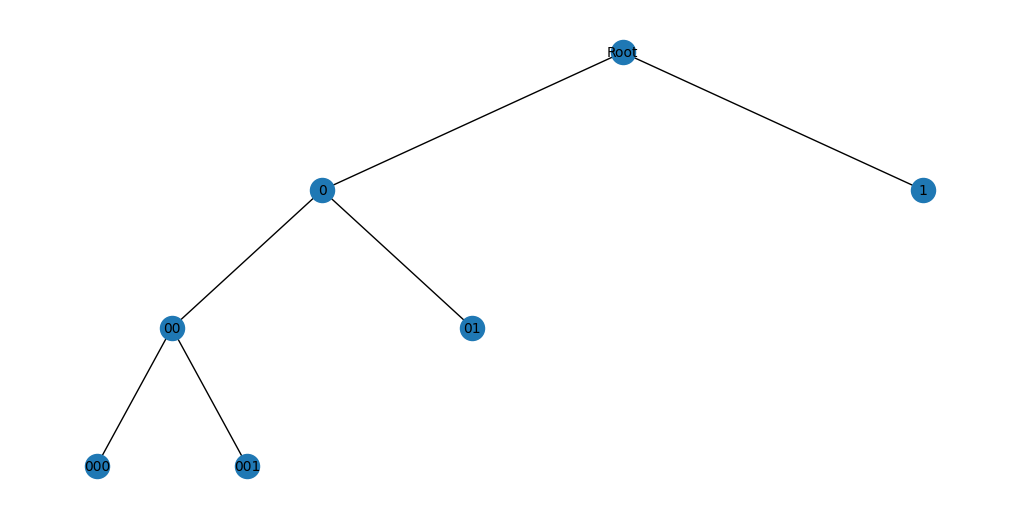

In [17]:
G = nx.Graph()

G.add_nodes_from(tree.get_node_names())
G.add_edges_from(tree.get_edges())


pos = {i:(SourceCoding.x_pos(i, len(i)),-len(i)) for i in tree.get_node_names()}
pos['Root'] = (0,0)
plt.rcParams['figure.figsize'] = (10, 5)
nx.draw(G,pos = pos, with_labels = True, font_size=10)

In [18]:
# With this code you can get the symbol
print(tree.search('001').get_data())

G


# Huffman encoding
Once we found the dictionary for the conversion the conversion is actually pretty easy.

In [19]:
DNA_sequence = "ATGAGCCCCCTTACAACAACAATTCTACTATCAAGCTTAGCAACCGGCACCATCATTACAGCCACAAGCTATCACTGACTATTAGCTTGAATTGGCCTTGAACTAAACACATTAGCTATCATTCCAATTATCTCAAAACAACATCACCCCCGAGCGACAGAGGCCGCCACCAAGTACTTCTTAACTCAAGCAGCTGCTTCAGCACTAATCCTATTCTCAAGTACAATCAACGCTTGACACTCAGGAACTTGGGACATTACACAAATAACAAACAATACATCAAACATCTTACTAACAATGGCACTAGCCATAAAATTAGGCCTTGCACCAACACACTACTGACTCCCAGAGGTTATTCAAGGAACATCAATAACAACAGCCCTAATTATTACTACGTGACAAAAACTAGCCCCTATAGCACTCATTATTATTACAAGCAACAACTTATCCTATATAGTCTTAATAACAATGGGGGTATTATCTACCATCGTAGGAGGATGGGGCGGCCTAAACCAAACCCAAACCCGAAAAATCATAGCGTACTCCTCAATCGCACACCTTGGCTGAATATCAATGGTTACCCCACTAATAACAAAACTACTCATTTTAAACCTTGGCATTTACATCCTAATAACAACAGCTATATTCCTCTCACTAATTTTATCAAAATCAAAAACCTTACAAGATACATCCACACTATGGGCACTATCCCCAACACTTATAATTTTAACAATACTAACACTATTATCCCTAGGAGGACTGCCCCCACTAACAGGATTCATACCCAAGTGACTTATTCTACAAGAATTAACAGCACAAAACCTACTAATAGTAGCCACACTTCTAGCCCTATCAGCACTCTTAAGCCTCTTCTTTTACCTCCGACTAACATACACAATGACCCTTACCACACCCCCCAACACCACTATATTCAAACACAAATGACGGTTTAACTATTTAAATAATACAACTCCCCTATCCATCTCCATAGCCCTCTCAACCCTATTATTACCAATTACACCCCTCATCATAATATAGAAACTTAGGATAACATTAAACCAAGGGCCTTCAAAGCCCAAAATAGGAGTGAAAATCCCCTAGTCTCTGATAAGACCTGTGATATTCTAAAACACATCTTCTGAATGCAACCCAGACAC"
dictionary = {'A': '1', 'C':'01', 'G':'001', 'T':'000'}

encoded_seq = ""

for i in DNA_sequence:
  encoded_seq += dictionary[i]

encoded_seq

'100000110010101010101000000101110111011100000001000101000100001110010100000010010111010100100101101011000011000000101100101011011100101000100001101000001101000100000010010100000000111000000001001010100000000111010001110110110000001001010001000011000000010111000000100001000011111011101100001101010101010011001010011011001100100101010010101101011100100010100000001000000110100001110010110010100000101000000011001011010001100001010001000000010000111001000101110000111010010100000000110110100001100100111010000000010010011011000000101101111000110111101110001011000011110110000100000010100011011100000100101101000100101011000111100000010010010101000000001011010111011011010001010000011010000101011001100100100000010000000111001001110110000111000110111011001010101000110000001000000101000101001000001101111110100010010101010100010001001011010000110000001000000100000010111001011101110100000010000101000100010001001000010000001100011011100000100100100100100010000001000010001010110000100100010010011001001

# Huffman decoding animation
For the decoding we need to use the tree since deconding is not easy as deconding. We can visualize the decoding process.




In [20]:
G = nx.Graph()
node_names = tree.get_node_names()
G.add_nodes_from(node_names)
G.add_edges_from(tree.get_edges())

node_to_color = {i:'lightblue' for i in node_names}
node_to_color['Root'] = 'orange'
nc = node_to_color.values()

visiting_node = tree.get_root()
encoded_seq_ = encoded_seq[:30]
print(encoded_seq_)
#node_to_color[visiting_node.get_string()] = 'orange'

100000110010101010101000000101


In [21]:
# create the frame

def update(i, encoded_seq_, node_to_color, nodes):

  global visiting_node
  #print(visiting_node.get_string())

  if visiting_node.get_left() == None and visiting_node.get_right() == None:
    node_to_color[visiting_node.get_string()] = 'lightblue'
    visiting_node = tree.get_root()
    node_to_color[visiting_node.get_string()] = 'orange'

  if encoded_seq[i] == '0':
    node_to_color[visiting_node.get_string()] = 'lightblue'
    visiting_node = visiting_node.get_left()
    node_to_color[visiting_node.get_string()] = 'orange'


  else:
    node_to_color[visiting_node.get_string()] = 'lightblue'
    visiting_node = visiting_node.get_right()
    node_to_color[visiting_node.get_string()] = 'orange'

  node_to_color['Root'] = 'orange'


  nodes.set_color(list(node_to_color.values()))
  return nodes,


# set up the image
fig = plt.figure()
nodes = nx.draw_networkx_nodes(G,pos,node_color=nc,node_size=400)
edges = nx.draw_networkx_edges(G,pos)

labels = {}
for i in node_names:
  labels[i] = r"$"+i+"$"

nx.draw_networkx_labels(G, pos, labels, font_size=12)

# create animation
anim = animation.FuncAnimation(fig, update, fargs = (encoded_seq_, node_to_color, nodes), frames=40, interval=1000, blit = True)
plt.close()


matplotlib.rcParams['animation.embed_limit'] = 2**128
rc('animation', html='jshtml')
#THIS IS FOR SAVING THE ANIMATION AS A MP4 VIDEO
#anim.save('huffman.mp4', writer="ffmpeg", dpi=300)
anim

In [22]:
encoded_seq_

'100000110010101010101000000101'

# Huffman decoding

In [23]:
visiting_node = tree.get_root()
decoded_seq = ""

for i in encoded_seq:
  if i == '0':
    visiting_node = visiting_node.get_left()
  else:
    visiting_node = visiting_node.get_right()

  if visiting_node.get_left() == None and visiting_node.get_right() == None:
    decoded_seq += visiting_node.get_data()
    visiting_node = tree.get_root()

decoded_seq


'ATGAGCCCCCTTACAACAACAATTCTACTATCAAGCTTAGCAACCGGCACCATCATTACAGCCACAAGCTATCACTGACTATTAGCTTGAATTGGCCTTGAACTAAACACATTAGCTATCATTCCAATTATCTCAAAACAACATCACCCCCGAGCGACAGAGGCCGCCACCAAGTACTTCTTAACTCAAGCAGCTGCTTCAGCACTAATCCTATTCTCAAGTACAATCAACGCTTGACACTCAGGAACTTGGGACATTACACAAATAACAAACAATACATCAAACATCTTACTAACAATGGCACTAGCCATAAAATTAGGCCTTGCACCAACACACTACTGACTCCCAGAGGTTATTCAAGGAACATCAATAACAACAGCCCTAATTATTACTACGTGACAAAAACTAGCCCCTATAGCACTCATTATTATTACAAGCAACAACTTATCCTATATAGTCTTAATAACAATGGGGGTATTATCTACCATCGTAGGAGGATGGGGCGGCCTAAACCAAACCCAAACCCGAAAAATCATAGCGTACTCCTCAATCGCACACCTTGGCTGAATATCAATGGTTACCCCACTAATAACAAAACTACTCATTTTAAACCTTGGCATTTACATCCTAATAACAACAGCTATATTCCTCTCACTAATTTTATCAAAATCAAAAACCTTACAAGATACATCCACACTATGGGCACTATCCCCAACACTTATAATTTTAACAATACTAACACTATTATCCCTAGGAGGACTGCCCCCACTAACAGGATTCATACCCAAGTGACTTATTCTACAAGAATTAACAGCACAAAACCTACTAATAGTAGCCACACTTCTAGCCCTATCAGCACTCTTAAGCCTCTTCTTTTACCTCCGACTAACATACACAATGACCCTTACCACACCCCCCAACACCACTATATTCAAACACAAATGACGGTTTAACTATTTAAATAATACAACTCCCCTATCCATCTCCATAGCCCTCTCA

In [24]:
decoded_seq == DNA_sequence

True

# War and peace compression

In [25]:
!wget -q https://raw.githubusercontent.com/MattiaFiore/Source-Coding-Project/main/book-war-and-peace.txt

In [26]:
book = ""
with open("book-war-and-peace.txt") as f:

  for i in f:
    book += i

<BarContainer object of 82 artists>

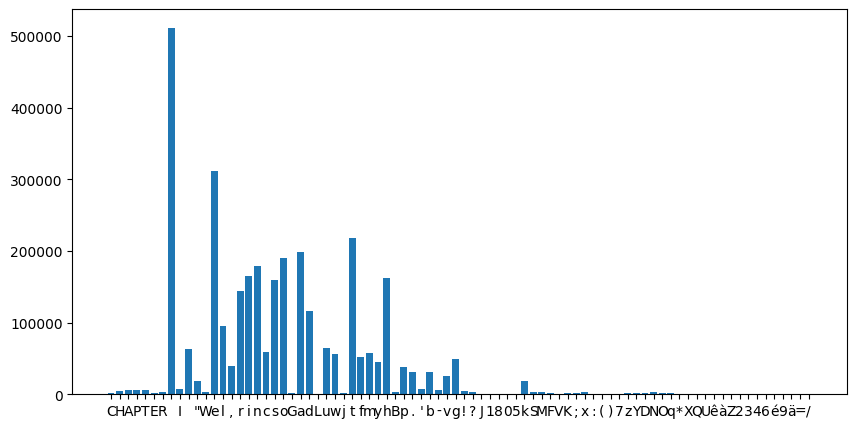

In [27]:
count = Counter(book)
plt.bar(count.keys(), count.values())

In [28]:
dictionary = {i:format(j, 'b') for j,i in enumerate(count.keys())}
max_len = ceil(log2(len(dictionary)))
for i in dictionary.keys():
    j = dictionary[i]
    dictionary[i] = '0'*(max_len-len(j)) + j


In [29]:
encoded_book = ""
for i in book:
  encoded_book += dictionary[i]

encoded_book[:50]

'00000000000001000001000000110000100000010100001100'

In [32]:
book = ''
with open("book-war-and-peace.txt") as f:

  for i in f:
    book += i

count = Counter(book)
len(count.values())
probabilities = {j : k /count.total() for j,k in count.items()}
N = 1
groups = SourceCoding.create_blocks(probabilities.keys(), N)
dictionary = SourceCoding.gen_dict(groups, probabilities)

dictionary2 = SourceCoding.huffman(dictionary)
#cleaning
dictionary2 = {"".join(j): k for j,k in dictionary2.items()}

In [34]:
dictionary2['e']

'111'

In [35]:
dictionary2['ä']

'0111000111011110010011'

In [36]:
encoded_book = ""
for i in book:
  encoded_book += dictionary2[i]

encoded_book[:50]

'01110000101000101100010100100110100101001110001001'

In [37]:
total_symbols = len(book)
total_bits = len(encoded_book)
bits_per_symbol = total_bits/total_symbols
bits_per_symbol
print(total_bits)

14390455


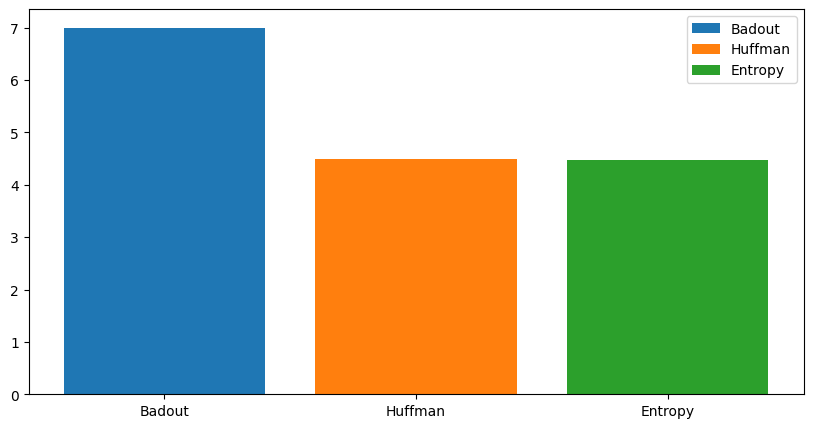

In [38]:
huffman = bits_per_symbol
badout = 7
entropy = sum([p*log2(1/p) for p in probabilities.values()])

plt.bar('Badout', badout)
plt.bar('Huffman', huffman)
plt.bar('Entropy', entropy)


plt.legend(['Badout', 'Huffman', 'Entropy'])

# DNA compression

In [39]:
DNA_sequence = "TCCATTGATTAATGGCCTGANTCGGATTAGANATCAATACACTATCAATTATTCCAATAATTTCAACATTACACCACCCACGATCAACTGAAGCTGCTACAAAATATTTCCTCACCCAAGCAGCTGCTTCANCTTTAATCCTTTTTTCAAGCACAATTAATGCCTGACAAACAGGATCATGAGACATTACCCAACTATCATCAACCCCCTCACACATTTTATTAACTATGGCTTTGGCCATAAAACTAGGACTCGCCCCACTTCACTTTTGATTACCAGAAGTAATTCAAGGGTCTTCCATAAACACAGCCTTAATTATTGTNACTTGACAAAAACTAGCCCCAATATCCCTAATCTTTTTAACCATAAATAATTTATCAACAACTATTTTAATGATAATAGGACTTGTATCTTCACTTGTCGGAGGATGAGCAGGACTTAATCAAACACAAACTCGAAAAATTATAGCCTACTCATCTATTGCTCACCTAGGGTGAATAGCAGCCATTTCCTCAATTATAACAAACATTTTAATCCTCAACCTATTAATTTACCTAATTATAACTACCTCAGTATTTTGCTTTATTATTATTACAAAATCAAAAACAATCCAAAACACAGCTACTATTTGGACAATATCACCAACACTAACAATTACCATAATACTTTCTTTACTTTCACTAGGAGGACTACCGCCACTAACAGGATTTATACCAAAATGAATAATTATAGAAGAACTTATTAATCAAAACTTTACTACAATTACTACTATGATAGCACTATCGTCCTTATTAAGCCTATTTTTTTATATTCGACTAACATATACAACTTCACTTACACTATCCCCAAACACAACCCAAACGAAATTTAAATGACGATTTTACCCAAACATAAAAACCACAGTAATTATAGTCTCTACAACAGTCACAATTTTTATATTACCGATACTTCCAATAATTTTGATATAAAAACTTAGGATAAACTAAACCAAGAGCCTTCAAAGCTCAAAAAAGGGGTGTAACCCCCCTAGTTTTTGTAAGACTTGTAAAATACTAATTTACATCTCTTGAATGCAACTTAAACACTTTAATTAAGCTAAAACCTTACTGAATAGGCGGGCTTTTAACCCACGAAAAATTAATTAACAGCTAATTTCCCAAACCAACGGGCTTCTATTCGCTTCCCCCGTCTGGGGGGGGAAACGGGAGAAGCCCCGGAGCCTTTAAGGGCTCTTCTTCAAACTTGCAATTTGACGTAAATCACTTACTTCGGGGCTTGATAAAGAAAGGAATTAAACCAATGTGAATAGGACTACAGCCTACCGCCTACCATTCGGCCACTTTACCTGTGTTTATTAATCGTTGA"

In [40]:
len(DNA_sequence)

1365

This are all the possible divisors of 1365:

1, 3, 5, 7, 13, 15, 21, 35, 39, 65, 91, 105, 195, 273, 455, 1365

Using Badout code we would need a total of:

$1365 \cdot 2 = 2730$ bits

In [41]:
count = Counter(DNA_sequence)
probabilities = {j : k /count.total() for j,k in count.items()}

# Compute entropy
entropy = sum([p*log2(1/p) for p in probabilities.values()])

total_length = {}
bits_per_symbol = {}

divisors = [1, 3, 5]
# You can change N value to try the functions with different groups
for i in divisors:
  N = i
  groups = SourceCoding.create_blocks(probabilities.keys(), N)
  dictionary = SourceCoding.gen_dict(groups, probabilities)

  # We clean the dictionary
  dictionary = {"".join(j): k for j,k in dictionary.items()}

  #we procede with huffman encoding

  start = time.time()
  enc_dict = SourceCoding.huffman(dictionary)
  end = time.time()

  print(f'Dictionary completed for groups of dimension: {i}')
  print(f'Time to complete: {end-start}s')

  encoded_seq = ""

  for j in range(0,len(DNA_sequence), N):
    encoded_seq += enc_dict[DNA_sequence[j:j+N]]

  total_length[N] = len(encoded_seq)
  bits_per_symbol[N] = len(encoded_seq)/len(DNA_sequence)


Dictionary completed for groups of dimension: 1
Time to complete: 3.504753112792969e-05s
Dictionary completed for groups of dimension: 3
Time to complete: 0.0013053417205810547s
Dictionary completed for groups of dimension: 5
Time to complete: 0.5685718059539795s


<BarContainer object of 1 artists>

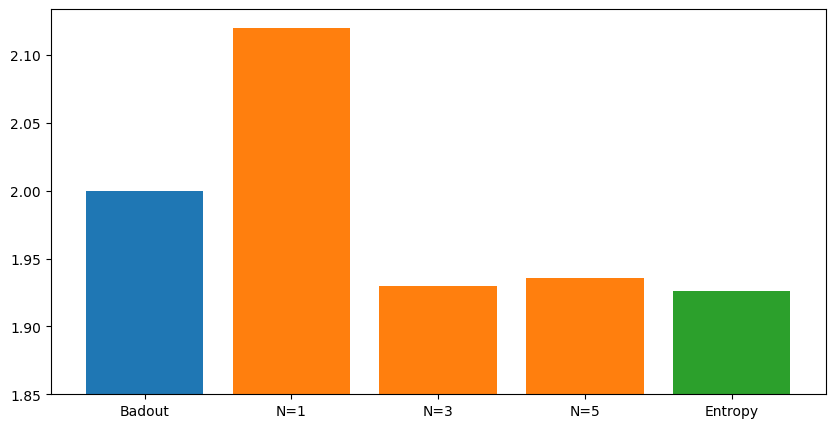

In [42]:
offset = 1.85
plt.bar('Badout', 2-offset, bottom = offset)
plt.bar(['N=1', 'N=3', 'N=5'], [i- offset for i in bits_per_symbol.values()], bottom = offset)
plt.bar('Entropy', entropy-offset, bottom = offset)